WorkFlow information

data set is 3 classes and 50 instances
here is 4 input and one output (species)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns  # single line model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignment/IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# displaying statsistical about data

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


preprocessing


In [ ]:
data.isnull().sum().sum()

0

<Axes: >

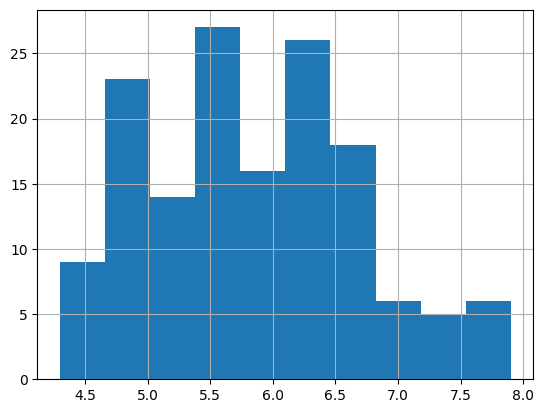

In [ ]:
data['sepal_length'].hist()  # only one input

Text(0, 0.5, 'Count')

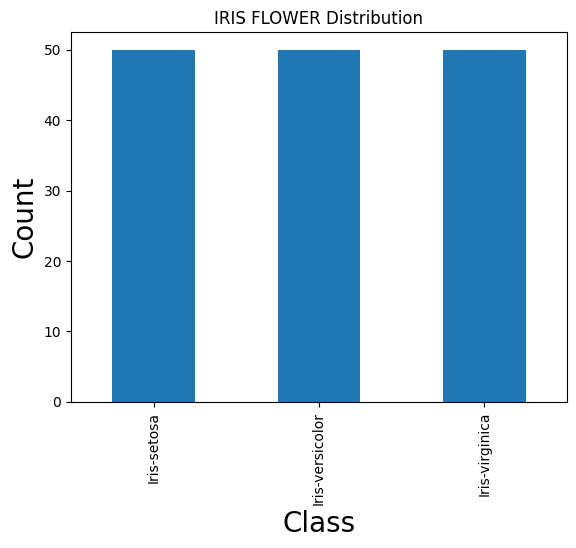

In [ ]:
species_plot = data['species'].value_counts().plot.bar(title = 'IRIS FLOWER Distribution')
species_plot.set_xlabel('Class',size=20)
species_plot.set_ylabel('Count',size=20)

# all input in the histogram


In [ ]:
# scatterplot

colors = ['red', 'yellow', 'green']
species = ['Iris-setosa',
    'Iris-versicolor',
    'iris-virginica']


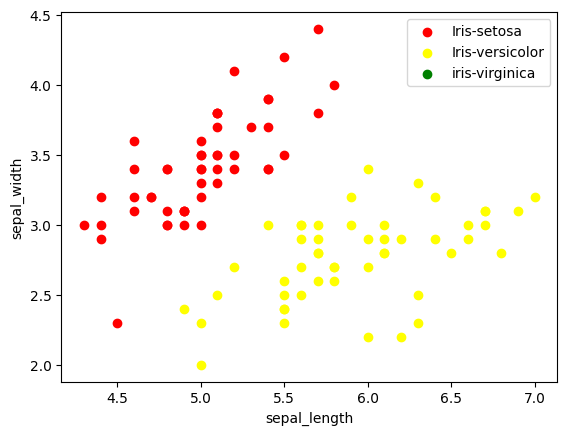

In [ ]:
for i in range(3):
  x = data[data['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

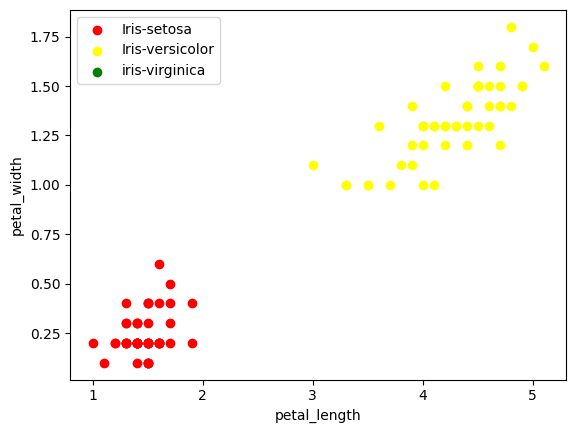

In [ ]:
for i in range(3):
  x = data[data['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

In [ ]:
# coorelation matrix ---


data.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

<ipython-input-19-d38f043a4082>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data.corr()


<Axes: >

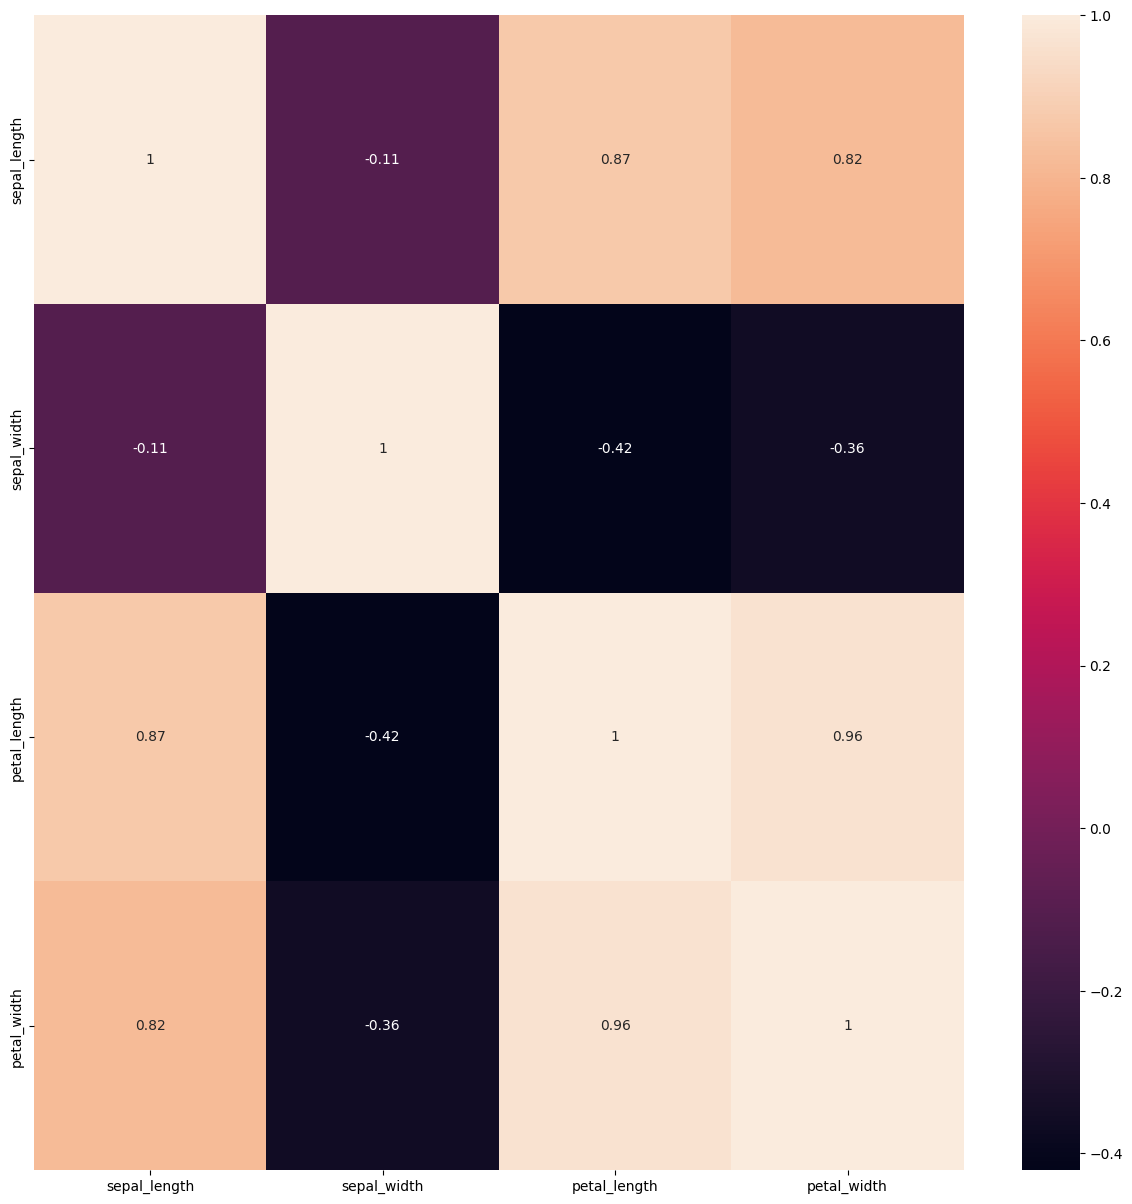

In [ ]:
corr= data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# it is more importsnt part becausr it is converting the string to some numeric value of output column species

In [ ]:
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#model training
from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30)

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)*100

97.77777777777777

In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
model.score(x_test, y_test)*100

97.77777777777777

In [ ]:
# cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
l_model = LogisticRegression()

In [ ]:
scores = cross_val_score(l_model, X, Y, cv=5, scoring='accuracy')

In [ ]:
mean_accuracy=scores.mean()

In [ ]:
mean_accuracy

0.9733333333333334